In [8]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform


#import wkey
from config import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

In [9]:
# Randomly generate a list of 965 cities. Use 50 to test for duplicates.
for x in range(2019):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      763
City       763
Country    763
dtype: int64

In [11]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
Worldclean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        Worldclean_cities_df.at[index, "City"] =  city_data["name"]
        Worldclean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        Worldclean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        Worldclean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        Worldclean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        Worldclean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        Worldclean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        Worldclean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("**************************************")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\agarf\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\agarf\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\agarf\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\agarf\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\agarf\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\agarf\Anaconda3\lib\s

**************************************
Proceesing: City #  1  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=butaritari
**************************************
Proceesing: City #  2  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=hualmay
**************************************
Proceesing: City #  3  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=rikitea
**************************************
Proceesing: City #  4  |  Urucara BR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=urucara
**************************************
Proceesing: City #  5  |  Strezhevoy RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=strezhevoy
**************************************
Proceesing: Ci

**************************************
Proceesing: City #  44  |  East London ZA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=east+london
**************************************
Proceesing: City #  45  |  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=arraial+do+cabo
**************************************
Proceesing: City #  46  |  Carnarvon ZA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=carnarvon
**************************************
Proceesing: City #  47  |  Sinnamary GF
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=sinnamary
**************************************
Proceesing: City #  48  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=clyde+river
********************

**************************************
Proceesing: City #  87  |  Ballina IE
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=ballina
City not found, skipping...
**************************************
Proceesing: City #  88  |  Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=ilulissat
**************************************
Proceesing: City #  89  |  Oga NG
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=oga
**************************************
Proceesing: City #  90  |  Castro CL
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=castro
City not found, skipping...
**************************************
Proceesing: City #  91  |  Iquique CL
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=iquique
**********

**************************************
Proceesing: City #  129  |  Chicama PE
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=chicama
**************************************
Proceesing: City #  130  |  Broome GB
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=broome
**************************************
Proceesing: City #  131  |  Changuinola PA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=changuinola
City not found, skipping...
**************************************
Proceesing: City #  132  |  Curup ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=curup
**************************************
Proceesing: City #  133  |  Codrington AU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=codrington
*******************

City not found, skipping...
**************************************
Proceesing: City #  172  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=lompoc
**************************************
Proceesing: City #  173  |  San Pedro AR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=san+pedro
City not found, skipping...
**************************************
Proceesing: City #  174  |  Necochea AR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=necochea
**************************************
Proceesing: City #  175  |  Novovarshavka RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=novovarshavka
**************************************
Proceesing: City #  176  |  Mugur-Aksy RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units

**************************************
Proceesing: City #  214  |  Cabo San Lucas MX
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=cabo+san+lucas
**************************************
Proceesing: City #  215  |  Meulaboh ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=meulaboh
**************************************
Proceesing: City #  216  |  Cap-aux-Meules CA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=cap-aux-meules
**************************************
Proceesing: City #  217  |  Faanui PF
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=faanui
**************************************
Proceesing: City #  218  |  Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=bandarbeyla
*******************

**************************************
Proceesing: City #  257  |  Carman CA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=carman
City not found, skipping...
City not found, skipping...
**************************************
Proceesing: City #  258  |  Skovorodino RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=skovorodino
**************************************
Proceesing: City #  259  |  Alaca TR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=alaca
**************************************
Proceesing: City #  260  |  Te Anau NZ
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=te+anau
**************************************
Proceesing: City #  261  |  Gushikawa JP
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=gus

**************************************
Proceesing: City #  299  |  Coruripe BR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=coruripe
**************************************
Proceesing: City #  300  |  Ambon FR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=ambon
**************************************
Proceesing: City #  301  |  Metro ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=metro
**************************************
Proceesing: City #  302  |  Nanortalik GL
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=nanortalik
**************************************
Proceesing: City #  303  |  Lahijan IR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=lahijan
**************************************
Proceesing: City

**************************************
Proceesing: City #  342  |  Viransehir TR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=viransehir
**************************************
Proceesing: City #  343  |  Rio Grande BR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=rio+grande
**************************************
Proceesing: City #  344  |  Jizan SA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=jizan
**************************************
Proceesing: City #  345  |  Mount Isa AU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=mount+isa
**************************************
Proceesing: City #  346  |  Beringovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=beringovskiy
*********************************

**************************************
Proceesing: City #  385  |  Sembakung ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=sembakung
**************************************
Proceesing: City #  386  |  Minsk BY
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=minsk
**************************************
Proceesing: City #  387  |  Shimoda JP
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=shimoda
**************************************
Proceesing: City #  388  |  Komsomolskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=komsomolskiy
**************************************
Proceesing: City #  389  |  Cairns AU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=cairns
City not found, skipping...
*******************

Proceesing: City #  428  |  Vila IT
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=vila
**************************************
Proceesing: City #  429  |  Laguna MX
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=laguna
**************************************
Proceesing: City #  430  |  Tanete ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=tanete
**************************************
Proceesing: City #  431  |  Gavle SE
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=gavle
**************************************
Proceesing: City #  432  |  Yerofey Pavlovich RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=yerofey+pavlovich
**************************************
Proceesing: City #  433  |  Phimai TH
http://api.

**************************************
Proceesing: City #  472  |  Carinhanha BR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=carinhanha
**************************************
Proceesing: City #  473  |  Galesong ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=galesong
**************************************
Proceesing: City #  474  |  Abalak NE
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=abalak
**************************************
Proceesing: City #  475  |  Iqaluit CA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=iqaluit
**************************************
Proceesing: City #  476  |  Kaka TM
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=kaka
**************************************
Proceesing: City

**************************************
Proceesing: City #  515  |  Salamanca ES
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=salamanca
**************************************
Proceesing: City #  516  |  Entebbe UG
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=entebbe
**************************************
Proceesing: City #  517  |  Dergachi RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=dergachi
City not found, skipping...
**************************************
Proceesing: City #  518  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=san+patricio
**************************************
Proceesing: City #  519  |  Kavaratti IN
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=kavaratti
*******

Proceesing: City #  558  |  Nizwa OM
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=nizwa
City not found, skipping...
**************************************
Proceesing: City #  559  |  Boissevain CA
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=boissevain
**************************************
Proceesing: City #  560  |  Birjand IR
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=birjand
**************************************
Proceesing: City #  561  |  Rocha UY
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=rocha
**************************************
Proceesing: City #  562  |  Maningrida AU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=maningrida
**************************************
Proceesing: City #  563

**************************************
Proceesing: City #  600  |  Lamu ID
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=lamu
**************************************
Proceesing: City #  601  |  Manta RO
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=manta
**************************************
Proceesing: City #  602  |  Kayes ML
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=kayes
**************************************
Proceesing: City #  603  |  Ivanteyevka RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=ivanteyevka
**************************************
Proceesing: City #  604  |  Abeche TD
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=abeche
**************************************
Proceesing: City #  605 

**************************************
Proceesing: City #  643  |  Coquimbo CL
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=coquimbo
**************************************
Proceesing: City #  644  |  Vizinga RU
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=vizinga
**************************************
Proceesing: City #  645  |  Ayr GB
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=ayr
City not found, skipping...
**************************************
Proceesing: City #  646  |  Pierre US
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=pierre
**************************************
Proceesing: City #  647  |  Buluang PH
http://api.openweathermap.org/data/2.5/weather?appid=8e32883c355b0302048287e7ba20c471&units=IMPERIAL&q=buluang
***********************************

In [13]:
Worldclean_cities_df.count()

City                681
Country             681
Temperature (F)     681
Latitude            681
Longitude           681
Humidity (%)        681
Cloudiness (%)      681
Wind Speed (mph)    681
dtype: int64

In [22]:
#Reseting the index
Worldclean_cities_df = Worldclean_cities_df.reset_index()
del Worldclean_cities_df['index']
Worldclean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Butaritari,KI,79.22,3.07,172.79,100,80,6.76
1,Hualmay,PE,69.41,-11.1,-77.61,86,36,4.74
2,Rikitea,PF,78.14,-23.12,-134.97,100,24,12.8
3,Urucara,BR,78.95,-2.54,-57.76,85,8,3.51
4,Strezhevoy,RU,23,60.73,77.6,73,0,6.71


In [16]:
# Saving data to a CSV file
Worldclean_cities_df.to_csv("WeatherPy_analysis/City_Data.csv")

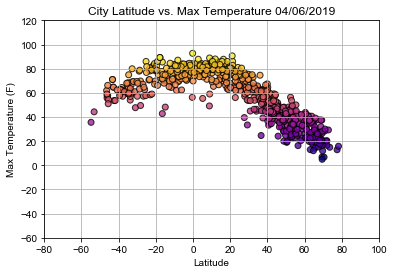

In [17]:
#Scatter plot to show Latitude vs. Temperature

plt.scatter(Worldclean_cities_df["Latitude"], 
            Worldclean_cities_df["Temperature (F)"], c=Worldclean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

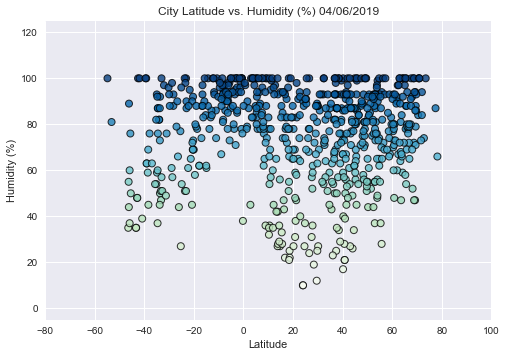

In [18]:

#Scatter plot to show Latitude vs. Humidity (%)

plt.scatter(Worldclean_cities_df["Latitude"], 
            Worldclean_cities_df["Humidity (%)"], c=Worldclean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

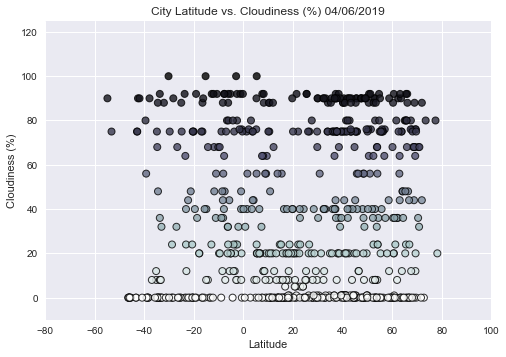

In [19]:

#Scatter plot to show Latitude vs. Cloudiness (%)

plt.scatter(Worldclean_cities_df["Latitude"], 
            Worldclean_cities_df["Cloudiness (%)"], c=Worldclean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

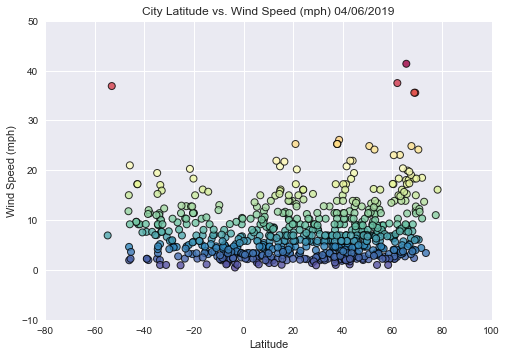

In [20]:
#Scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(Worldclean_cities_df["Latitude"], 
            Worldclean_cities_df["Wind Speed (mph)"], c=Worldclean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()

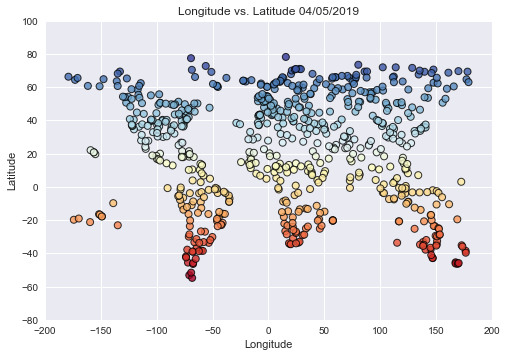

In [23]:
#Scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(Worldclean_cities_df["Longitude"], 
            Worldclean_cities_df["Latitude"], c=Worldclean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Longitude.png")

# Show plot
plt.show()